# How to Use and Remove Trend

## Trend in Time Series
* Types of Trends:
    - Deterministic
    - Stochastic

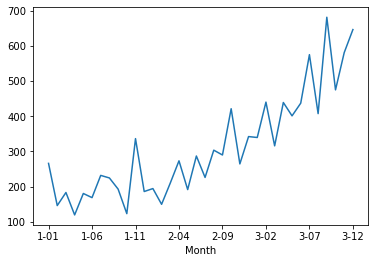

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('datasets/shampoo-sales.csv', index_col=0, parse_dates=True, squeeze=True)
series.plot()
plt.show()



## Detrend by differencing
```value(t) = observation(t) = observation(t-1)```


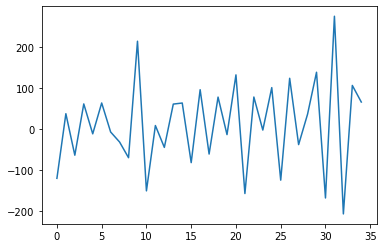

In [9]:
diff = list()
for i in range(1, len(series)):
    value = series[i] - series[i-1]
    diff.append(value)
diff = pd.Series(diff)
diff.plot()
plt.show()

## Detrend by Model fitting

Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method.

```value(t) = observation(t) - prediction(t)```


<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


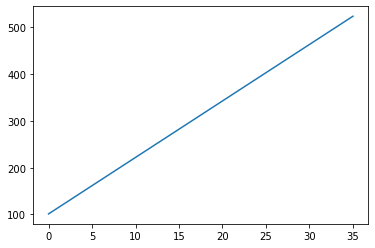

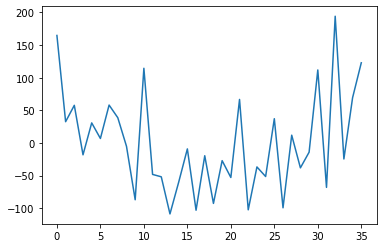

In [18]:
# Implement by training a scikit-learn LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(series))] # X is an incremental sequence with the same length as series
print(type(X))
print(X)
X = np.reshape(X, (len(X),1))
y = series.values # y is the series
print(type(y))

# model:
model = LinearRegression()
model.fit(X, y)
# calculate trend:
trend = model.predict(X)

# plot trend
print(type(trend))
plt.plot(trend)
plt.show()

# detrend
detrended = [y[i] - trend[i] for i in range(0, len(series))]

# plot detrend
plt.plot(detrended)
plt.show()